In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

np.random.seed(42)

In [2]:

df = pd.read_csv('02-Dataset/classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [3]:
# The total_days represents the total amount of time
# each student has spent in classroom.
# get the average classroom time for control group
control_mean = df.query('group == "control"').total_days.mean()

# get the average classroom time for experiment group
experiment_mean = df.query('group == "experiment"').total_days.mean()

# display average classroom time for each group
control_mean, experiment_mean

(73.36899038461539, 74.6715935334873)

In [4]:
# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

1.3026031488719099

In [5]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
for _ in range(10000):
    sample = df.sample(df.shape[0], replace = True)
    sample_control_mean = sample.query('group == "control"').total_days.mean()
    sample_experiment_mean = sample.query('group == "experiment"').total_days.mean()
    sample_obs_diff = sample_experiment_mean - sample_control_mean
    diffs.append(sample_obs_diff)


In [6]:
# convert to numpy array
diffs = np.array(diffs)

C:\Users\ander\AppData\Local\Programs\Python\Python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


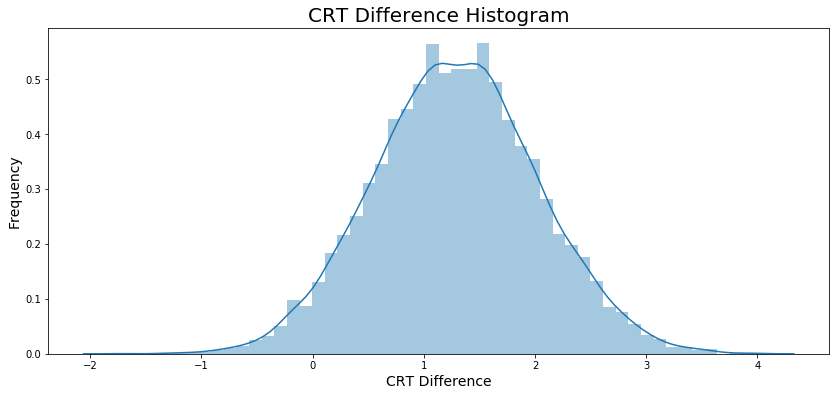

In [7]:
# plot sampling distribution
plt.figure(figsize = [14,6])
sns.distplot(diffs);
plt.title('CRT Difference Histogram', fontsize = 20)
plt.xlabel('CRT Difference', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.show()

In [8]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(diffs), size = 10000)

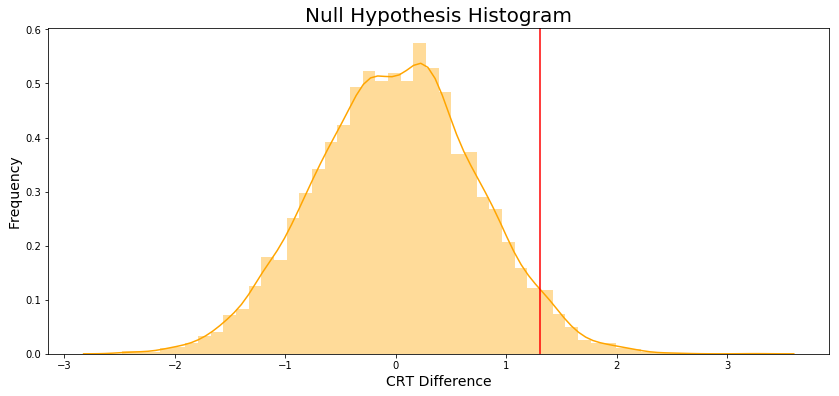

In [9]:
# Plot the null distribution
plt.figure(figsize = [14,6])
sns.distplot(null_vals, color = 'orange');
plt.title('Null Hypothesis Histogram', fontsize = 20)
plt.xlabel('CRT Difference', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.axvline(obs_diff, color = 'red')
plt.show()

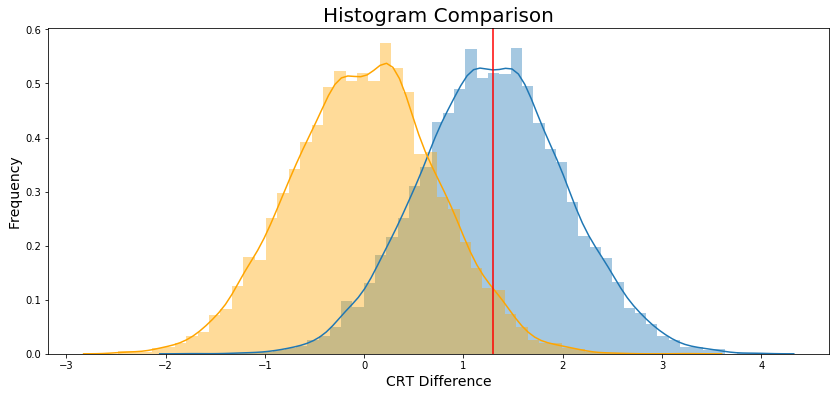

In [10]:
# Plot observed statistic with the null distibution
plt.figure(figsize = [14,6])
sns.distplot(diffs);
sns.distplot(null_vals, color = 'orange');
plt.title('Histogram Comparison', fontsize = 20)
plt.xlabel('CRT Difference', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.axvline(obs_diff, color = 'red')
plt.show()

In [11]:
# compute p value
p_value = (null_vals > obs_diff).mean()

p_value

0.0384

>**Conclusion:** Reject the $H_0$ because p_value < $\alpha$